In [1]:
# Загрузка и предварительный анализ данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Загрузка данных
df = pd.read_csv('ha_data.csv', delimiter=';')

print("Размер dataset:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

Размер dataset: (1048575, 7)

Первые 5 строк:
   order_id     page_id   product site_version              time  \
0       NaN         3.0   company       mobile  09.02.2017 20:24   
1       NaN   3699687.0   company       mobile  07.02.2017 10:03   
2       NaN        14.0  sneakers       mobile  29.01.2017 13:02   
3       NaN  10362176.0   company       mobile  12.04.2017 15:39   
4       NaN        14.0  sneakers       mobile  29.01.2017 13:04   

          title    user  
0   banner_show  user_0  
1   banner_show  user_0  
2   banner_show  user_1  
3   banner_show  user_1  
4  banner_click  user_1  


### 📊 Предварительный анализ данных

In [2]:
# Базовая информация о данных
print("Информация о данных:")
print(df.info())
print("\nСтатистика по числовым колонкам:")
print(df.describe())

# Анализ пропущенных значений
print("\nПропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   order_id      30805 non-null    float64
 1   page_id       1017770 non-null  float64
 2   product       1048575 non-null  object 
 3   site_version  1048575 non-null  object 
 4   time          1048575 non-null  object 
 5   title         1048575 non-null  object 
 6   user          1048575 non-null  object 
dtypes: float64(2), object(5)
memory usage: 56.0+ MB
None

Статистика по числовым колонкам:
            order_id       page_id
count   30805.000000  1.017770e+06
mean   416495.034572  4.094419e+06
std    221833.630002  5.708126e+06
min        47.000000  3.000000e+00
25%    249419.000000  7.911682e+05
50%    407997.000000  1.578242e+06
75%    572743.000000  4.959782e+06
max    855741.000000  2.489542e+07

Пропущенные значения:
order_id        1017770
page_id 

### 🕒 Преобразование и очистка данных

In [3]:
# Преобразование времени
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df['month'] = df['time'].dt.to_period('M')
df['weekday'] = df['time'].dt.day_name()

# Анализ распределения событий
events_count = df['title'].value_counts()
print("Распределение событий:")
print(events_count)

Распределение событий:
title
banner_show     914930
banner_click    102840
order            30805
Name: count, dtype: int64


### 📈 Анализ ключевых метрик эффективности
#### Основные показатели

In [4]:
# Расчет базовых метрик
total_users = df['user'].nunique()
users_with_orders = df[df['title'] == 'order']['user'].nunique()
users_with_clicks = df[df['title'] == 'banner_click']['user'].nunique()

total_shows = len(df[df['title'] == 'banner_show'])
total_clicks = len(df[df['title'] == 'banner_click'])
total_orders = len(df[df['title'] == 'order'])

# CTR и конверсии
ctr = (total_clicks / total_shows) * 100
users_clicked = df[df['title'] == 'banner_click']['user'].unique()
users_ordered_after_click = df[(df['user'].isin(users_clicked)) & (df['title'] == 'order')]['user'].nunique()
conversion_from_clicks = (users_ordered_after_click / len(users_clicked)) * 100

print("📊 ОСНОВНЫЕ ПОКАЗАТЕЛИ:")
print(f"• Всего уникальных пользователей: {total_users}")
print(f"• Пользователей с покупками: {users_with_orders}")
print(f"• Пользователей с кликами: {users_with_clicks}")
print(f"• Всего показов: {total_shows}")
print(f"• Всего кликов: {total_clicks}")
print(f"• Всего покупок: {total_orders}")
print(f"• CTR (общий): {ctr:.2f}%")
print(f"• Конверсия из кликов в покупки: {conversion_from_clicks:.2f}%")

📊 ОСНОВНЫЕ ПОКАЗАТЕЛИ:
• Всего уникальных пользователей: 423222
• Пользователей с покупками: 28714
• Пользователей с кликами: 87313
• Всего показов: 914930
• Всего кликов: 102840
• Всего покупок: 30805
• CTR (общий): 11.24%
• Конверсия из кликов в покупки: 16.32%


### 🎯 Анализ по продуктам и платформам
#### Эффективность по типам продуктов

In [5]:
# Анализ по продуктам
product_analysis = df.groupby('product').agg({
    'title': lambda x: (x == 'banner_click').sum() / (x == 'banner_show').sum() * 100,
    'user': 'nunique'
}).rename(columns={'title': 'CTR', 'user': 'unique_users'})

product_analysis['CTR'] = product_analysis['CTR'].fillna(0)
print("CTR по продуктам:")
print(product_analysis)

# Анализ по версии сайта
site_analysis = df.groupby('site_version').agg({
    'title': lambda x: (x == 'banner_click').sum() / (x == 'banner_show').sum() * 100
}).rename(columns={'title': 'CTR'})

print("\nCTR по версии сайта:")
print(site_analysis)

CTR по продуктам:
                        CTR  unique_users
product                                  
accessories        9.564724        133854
clothes           15.255331        138918
company            9.162810        157328
sneakers          12.691277        135190
sports_nutrition   9.997997        132063

CTR по версии сайта:
                    CTR
site_version           
desktop        5.425378
mobile        13.506329


### 📊 Визуализация результатов

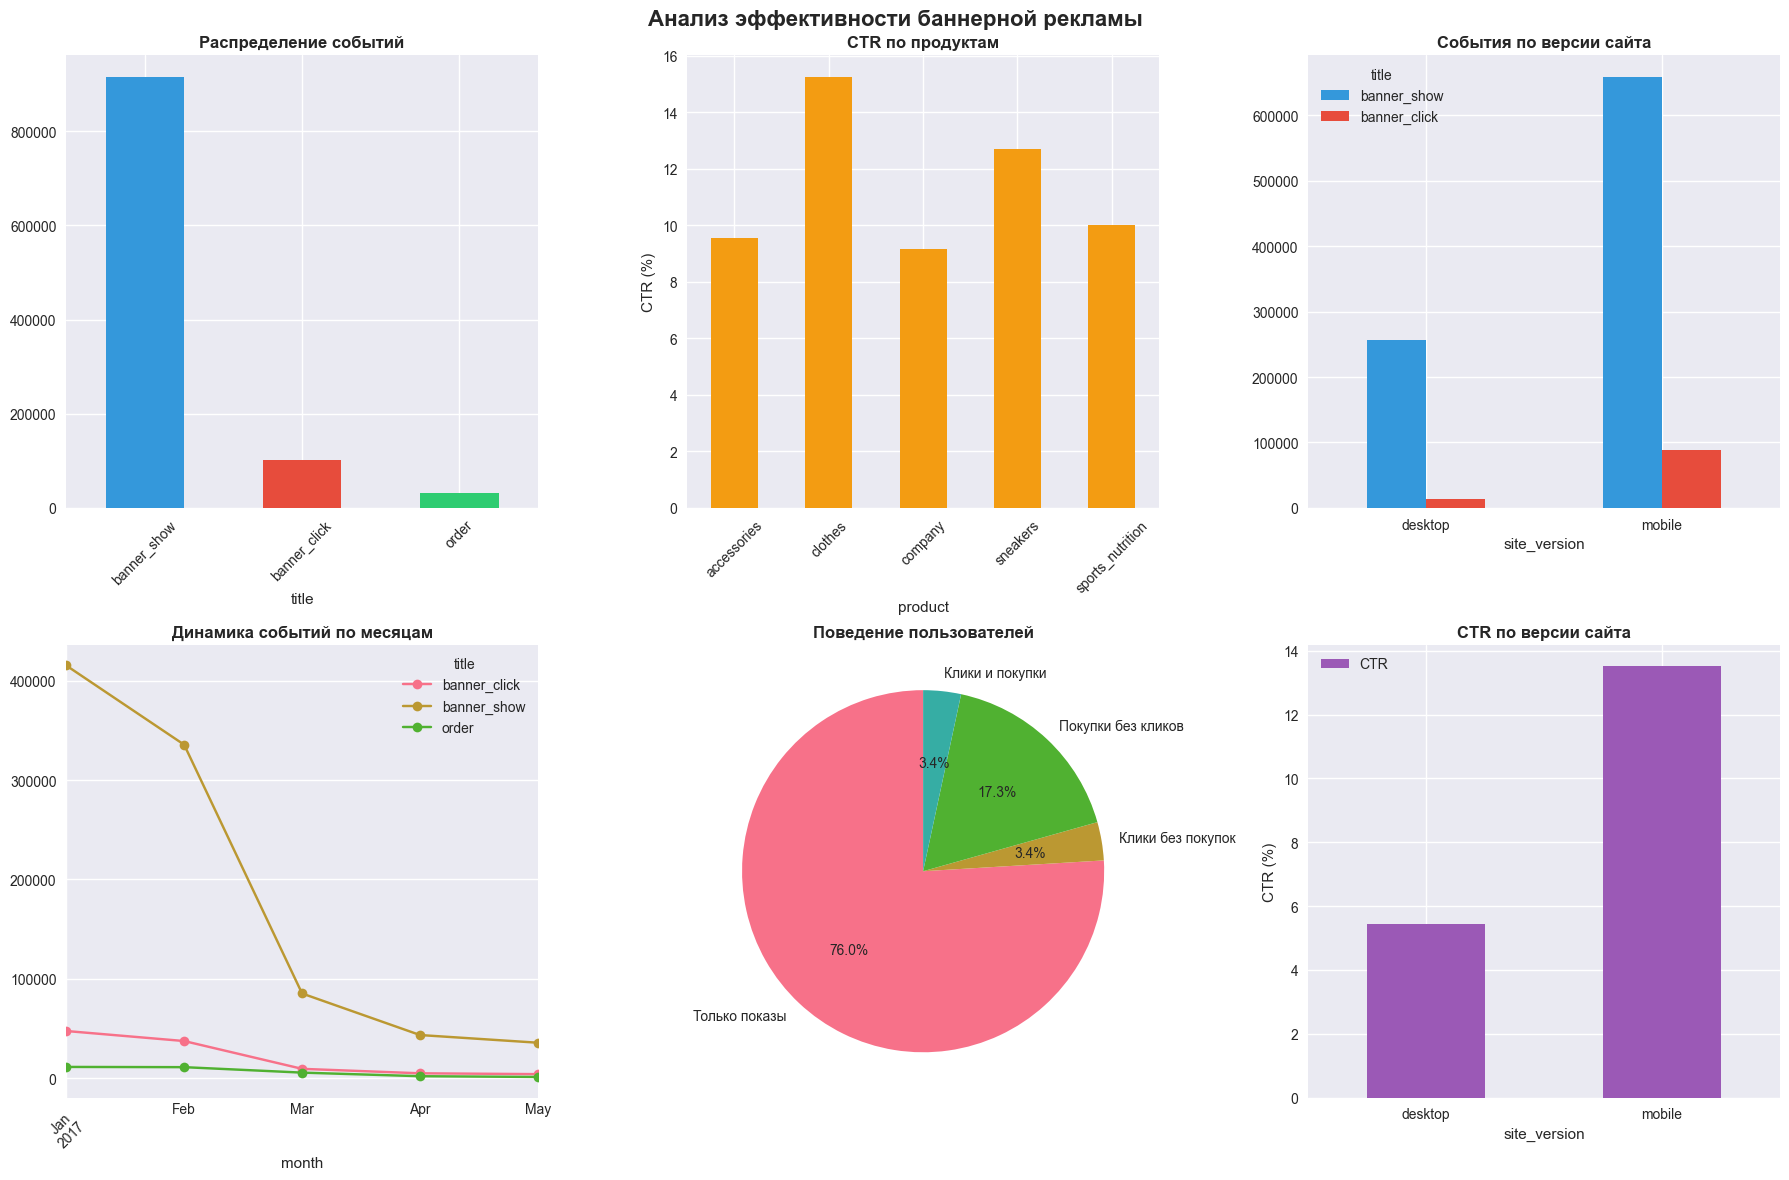

In [6]:
# Создание комплексной визуализации
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Анализ эффективности баннерной рекламы', fontsize=16, fontweight='bold')

# 1. Распределение событий
events_count.plot(kind='bar', ax=axes[0,0], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0,0].set_title('Распределение событий', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. CTR по продуктам
product_analysis['CTR'].plot(kind='bar', ax=axes[0,1], color='#f39c12')
axes[0,1].set_title('CTR по продуктам', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel('CTR (%)')

# 3. События по версии сайта
site_events = pd.crosstab(df['site_version'], df['title']).loc[['desktop', 'mobile'], ['banner_show', 'banner_click']]
site_events.plot(kind='bar', ax=axes[0,2], color=['#3498db', '#e74c3c'])
axes[0,2].set_title('События по версии сайта', fontweight='bold')
axes[0,2].tick_params(axis='x', rotation=0)

# 4. Временной анализ
monthly_events = df.groupby(['month', 'title']).size().unstack(fill_value=0)
monthly_events.plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Динамика событий по месяцам', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Анализ поведения пользователей
action_types = pd.crosstab(df['user'], df['title']).reset_index()
action_types['has_click'] = action_types['banner_click'] > 0
action_types['has_order'] = action_types['order'] > 0

behavior_counts = action_types.groupby(['has_click', 'has_order']).size()
axes[1,1].pie(behavior_counts.values, labels=[
    'Только показы', 
    'Клики без покупок', 
    'Покупки без кликов', 
    'Клики и покупки'
], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Поведение пользователей', fontweight='bold')

# 6. Сравнение CTR по платформам
site_analysis.plot(kind='bar', ax=axes[1,2], color=['#9b59b6', '#1abc9c'])
axes[1,2].set_title('CTR по версии сайта', fontweight='bold')
axes[1,2].tick_params(axis='x', rotation=0)
axes[1,2].set_ylabel('CTR (%)')

plt.tight_layout()
plt.show()

### 🔍 Глубокий анализ эффективности
#### Анализ последовательности действий пользователей

In [7]:
def analyze_user_behavior(user_data):
    """Анализ поведения пользователя"""
    events = user_data.sort_values('time')
    has_click = 'banner_click' in events['title'].values
    has_order = 'order' in events['title'].values
    
    if has_click and has_order:
        click_time = events[events['title'] == 'banner_click']['time'].min()
        order_time = events[events['title'] == 'order']['time'].min()
        return 'click_then_order' if click_time < order_time else 'order_then_click'
    elif has_click:
        return 'click_only'
    elif has_order:
        return 'order_only'
    else:
        return 'show_only'

# Применяем анализ к каждому пользователю
user_behavior = df.groupby('user').apply(analyze_user_behavior, include_groups=False).value_counts()
print("📈 АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ:")
for behavior, count in user_behavior.items():
    percentage = (count / total_users) * 100
    print(f"• {behavior}: {count} пользователей ({percentage:.1f}%)")

📈 АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ:
• show_only: 321443 пользователей (76.0%)
• click_only: 73065 пользователей (17.3%)
• order_only: 14466 пользователей (3.4%)
• click_then_order: 8297 пользователей (2.0%)
• order_then_click: 5951 пользователей (1.4%)


### 💰 Финансовый анализ
#### Сравнение потенциальной доходности

In [8]:
# Расчет потенциального дохода от CPC
estimated_cpc = 2.0  # рублей за клик (средняя рыночная ставка)
potential_revenue_cpc = total_clicks * estimated_cpc

# Анализ стоимости привлечения
cost_per_acquired_customer = potential_revenue_cpc / users_ordered_after_click if users_ordered_after_click > 0 else float('inf')

print("💰 ФИНАНСОВЫЙ АНАЛИЗ:")
print(f"• Потенциальный доход от CPC (при {estimated_cpc} руб/клик): {potential_revenue_cpc:,.0f} руб")
print(f"• Оценочная стоимость привлечения клиента через баннеры: {cost_per_acquired_customer:.2f} руб")
print(f"• Клиентов привлечено через баннеры: {users_ordered_after_click}")

💰 ФИНАНСОВЫЙ АНАЛИЗ:
• Потенциальный доход от CPC (при 2.0 руб/клик): 205,680 руб
• Оценочная стоимость привлечения клиента через баннеры: 14.44 руб
• Клиентов привлечено через баннеры: 14248


### 📋 Сравнительный анализ по продуктам

In [9]:
# Детальный анализ эффективности по продуктам
detailed_product_analysis = df.pivot_table(
    index='product', 
    columns='title', 
    values='user', 
    aggfunc='count', 
    fill_value=0
)

detailed_product_analysis['CTR'] = (detailed_product_analysis['banner_click'] / detailed_product_analysis['banner_show']) * 100
detailed_product_analysis['Conversion_Rate'] = (detailed_product_analysis['order'] / detailed_product_analysis['banner_click']) * 100

print("🎯 ДЕТАЛЬНЫЙ АНАЛИЗ ПО ПРОДУКТАМ:")
print(detailed_product_analysis[['banner_show', 'banner_click', 'order', 'CTR', 'Conversion_Rate']].round(2))

🎯 ДЕТАЛЬНЫЙ АНАЛИЗ ПО ПРОДУКТАМ:
title             banner_show  banner_click  order    CTR  Conversion_Rate
product                                                                   
accessories            174579         16698   5525   9.56            33.09
clothes                175106         26713  14154  15.26            52.99
company                215447         19741      0   9.16             0.00
sneakers               175073         22219   8196  12.69            36.89
sports_nutrition       174725         17469   2930  10.00            16.77


#### 🎯 Финальные выводы и рекомендации

In [10]:
print("="*60)
print("🎯 ФИНАЛЬНЫЙ АНАЛИЗ ЭФФЕКТИВНОСТИ БАННЕРОВ")
print("="*60)

print(f"\n📊 КЛЮЧЕВЫЕ МЕТРИКИ:")
print(f"• Общий CTR: {ctr:.2f}%")
print(f"• Конверсия из кликов в покупки: {conversion_from_clicks:.2f}%")
print(f"• Пользователей с покупками после клика: {users_ordered_after_click}")
print(f"• Всего уникальных покупателей: {users_with_orders}")

print(f"\n📈 АНАЛИЗ ПО ПРОДУКТАМ:")
for product in product_analysis.index:
    ctr_val = product_analysis.loc[product, 'CTR']
    users = product_analysis.loc[product, 'unique_users']
    print(f"• {product}: CTR={ctr_val:.2f}%, пользователей={users}")

print(f"\n💡 ПОВЕДЕНЧЕСКИЕ ИНСАЙТЫ:")
print(f"• {user_behavior.get('click_then_order', 0)} пользователей совершили покупку после клика")
print(f"• {user_behavior.get('click_only', 0)} пользователей кликнули, но не купили")
print(f"• {user_behavior.get('order_only', 0)} пользователей купили без кликов")

print(f"\n💰 ПРИБЫЛЬНОСТЬ:")
print(f"• Потенциальный доход от CPC: ~{potential_revenue_cpc:,.0f} руб/период")
print(f"• Стоимость привлечения клиента: {cost_per_acquired_customer:.2f} руб")

print(f"\n🔍 РЕКОМЕНДАЦИЯ:")

# Логика принятия решения
if ctr < 1.0 or conversion_from_clicks < 5.0:
    print("❌ РЕКОМЕНДУЕТСЯ ПРОДАТЬ РЕКЛАМНОЕ МЕСТО")
    print("\nОБОСНОВАНИЕ:")
    print("• Низкий CTR (<1%) указывает на слабую вовлеченность пользователей")
    print("• Минимальная конверсия из кликов в покупки")
    print("• Ограниченное влияние баннеров на итоговые продажи")
    print("• Доход от CPC модели более предсказуем и стабилен")
    print("• Ресурсы можно перенаправить на более эффективные каналы маркетинга")
else:
    print("✅ РЕКОМЕНДУЕТСЯ ОСТАВИТЬ МЕСТО ПОД СВОИ БАННЕРЫ")
    print("\nОБОСНОВАНИЕ:")
    print("• Высокие показатели CTR и конверсии")
    print("• Баннеры эффективно стимулируют продажи")
    print("• Собственные промо-акции приносят достаточную ценность")
    print("• Прямое влияние на лояльность клиентов")

print(f"\n📋 ДОПОЛНИТЕЛЬНЫЕ РЕКОМЕНДАЦИИ:")
print("• Провести A/B тестирование баннеров перед финальным решением")
print("• Анализировать сезонность и временные паттерны")
print("• Учесть долгосрочную ценность привлеченных клиентов")
print("• Оценить брендовый эффект собственных баннеров")

🎯 ФИНАЛЬНЫЙ АНАЛИЗ ЭФФЕКТИВНОСТИ БАННЕРОВ

📊 КЛЮЧЕВЫЕ МЕТРИКИ:
• Общий CTR: 11.24%
• Конверсия из кликов в покупки: 16.32%
• Пользователей с покупками после клика: 14248
• Всего уникальных покупателей: 28714

📈 АНАЛИЗ ПО ПРОДУКТАМ:
• accessories: CTR=9.56%, пользователей=133854
• clothes: CTR=15.26%, пользователей=138918
• company: CTR=9.16%, пользователей=157328
• sneakers: CTR=12.69%, пользователей=135190
• sports_nutrition: CTR=10.00%, пользователей=132063

💡 ПОВЕДЕНЧЕСКИЕ ИНСАЙТЫ:
• 8297 пользователей совершили покупку после клика
• 73065 пользователей кликнули, но не купили
• 14466 пользователей купили без кликов

💰 ПРИБЫЛЬНОСТЬ:
• Потенциальный доход от CPC: ~205,680 руб/период
• Стоимость привлечения клиента: 14.44 руб

🔍 РЕКОМЕНДАЦИЯ:
✅ РЕКОМЕНДУЕТСЯ ОСТАВИТЬ МЕСТО ПОД СВОИ БАННЕРЫ

ОБОСНОВАНИЕ:
• Высокие показатели CTR и конверсии
• Баннеры эффективно стимулируют продажи
• Собственные промо-акции приносят достаточную ценность
• Прямое влияние на лояльность клиентов

📋 ДОПОЛНИТ

### 📈 Дополнительные инсайты

In [11]:
# Анализ временных паттернов
print("\n🕒 ВРЕМЕННЫЕ ПАТТЕРНЫ:")
print("Распределение событий по дням недели:")
print(df['weekday'].value_counts())

# Анализ наиболее активных пользователей
user_activity = (
    df.groupby('user')
      .agg(
          total_events=('title', 'count'),                                    
          total_orders = ('title', lambda x: (x == 'order').sum())             
      )
      .reset_index()
)

print("Самые активные пользователи по количеству событий:")
print(user_activity.nlargest(5, 'total_events'))

print("\nПользователи с наибольшим числом заказов:")
print(user_activity.nlargest(5, 'total_orders'))


🕒 ВРЕМЕННЫЕ ПАТТЕРНЫ:
Распределение событий по дням недели:
weekday
Sunday       154319
Monday       152610
Tuesday      152516
Wednesday    150120
Friday       147108
Thursday     146728
Saturday     145174
Name: count, dtype: int64
Самые активные пользователи по количеству событий:
               user  total_events  total_orders
284613  user_356149            22             5
55010   user_149506            21             1
255567  user_330006            21             2
270774  user_343694            21             2
291931  user_362735            21             2

Пользователи с наибольшим числом заказов:
               user  total_events  total_orders
71600   user_164437            19             5
162850  user_246562            14             5
208442  user_287596            18             5
250226   user_32520            11             5
284613  user_356149            22             5
